<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%203/K_NN_CreditDataset_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving CreditDataset.csv to CreditDataset.csv


In [3]:
# Load dataset
dataset = pd.read_csv('CreditDataset.csv')

In [4]:
# Cek tipe data untuk melihat apakah ada kolom kategorikal
print(dataset.dtypes)


x1       object
x2        int64
x3       object
x4       object
x5        int64
x6       object
x7       object
x8        int64
x9       object
x10      object
x11       int64
x12      object
x13       int64
x14      object
x15      object
x16       int64
x17      object
x18       int64
x19      object
x20      object
Class     int64
dtype: object


In [5]:
# Mengonversi data kategorikal menjadi numerik (misalnya dengan One-Hot Encoding)
dataset_encoded = pd.get_dummies(dataset)

In [6]:
# Memisahkan features dan target (asumsikan kolom terakhir adalah target)
X = dataset_encoded.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = dataset_encoded.iloc[:, -1]   # Kolom terakhir sebagai target


In [7]:
# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standarisasi fitur (K-NN sangat sensitif terhadap skala fitur)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Membuat model K-NN (dengan k=5 sebagai default)
model = KNeighborsClassifier(n_neighbors=5)

In [10]:
# Melatih model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Prediksi pada data testing
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # untuk ROC dan AUC


In [12]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [13]:
# Metrik Evaluasi
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC AUC: ", roc_auc)

Accuracy:  0.99
Precision:  1.0
Recall:  0.7777777777777778
F1 Score:  0.875
ROC AUC:  0.9997091332169866


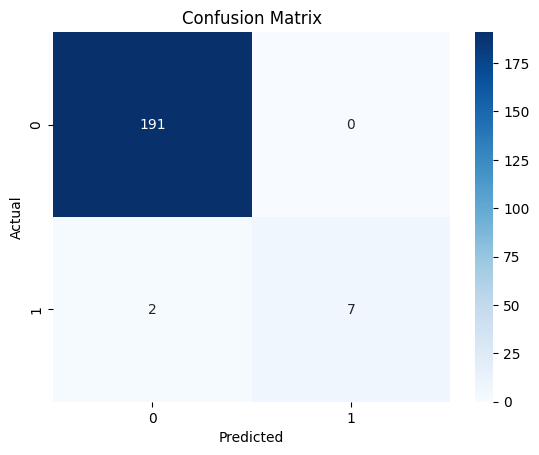

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

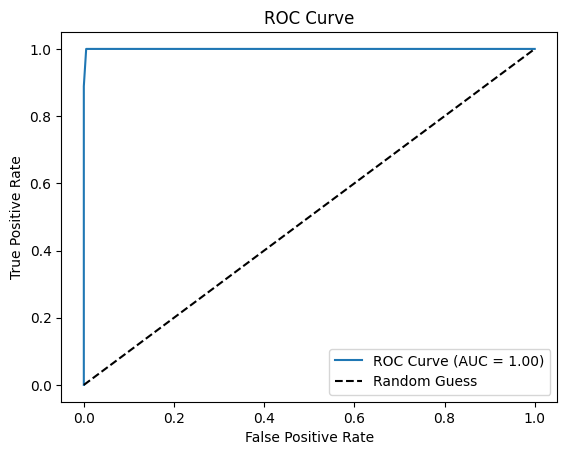

In [15]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()